In [37]:
import numpy as np
from numpy.linalg import det, inv, matrix_rank, eig
from sympy import Matrix, symbols

a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

# Common matrix operations

## Multiplication
***With a number*** (aka scalar, because it scales the matrix).

In [38]:
5 * a

array([[ 5, 10],
       [15, 20]])

**With another matrix.**

It can be viewed as a linear transformation of a coordinate system. Example of 90 degree rotation transform:


In [39]:
transform = np.array([[0,-1],[1,0]])
i = np.array([1,0])
np.matmul(transform,i)

array([0, 1])

Multiplying two square matrices can be viewed as composing two transforms. The one on the right is applied first. Example of rotation then shear transforms:

In [40]:
transform = np.matmul(np.array([[1,1],[0,1]]), np.array([[0,-1],[1,0]]))
transform

array([[ 1, -1],
       [ 1,  0]])

**Identity matrix** multiplication preserves the original matrix

In [41]:
np.matmul(a,np.eye(2))

array([[1., 2.],
       [3., 4.]])

## Dot product
Dot product between two vectors (1d matrices or tensors) gives you an idea about their orientation:

- if dot product is zero -> perpendicular, negative ->opposite directions (angle > 90 degrees)

It is also a way to map vectors into a different space (e.g. lower/higher dimensional). For example the projection of a 2d vector to a 1d line. Dot product is just a shorthand for multiply a and b transponse: $A \bullet B = AB^T$

In [42]:
a * a

array([[ 1,  4],
       [ 9, 16]])

## Transpose
Rows become columns and vice versa. If $A=A^T$ then A is **symmetric** (implies that A is square).

In [43]:
a.T

array([[1, 3],
       [2, 4]])

## Determinant
If determinant is zero, the matrix is called **singular**. It means that the matrix vectors are linearly dependent and that dimensionality of space is reduced. Negative determinant means that the orientation of space is inverted (e.g. flipped). The absolute value of the determinant shows how a shape's size will change.

In [58]:
det(a) # a flips space and increases area twofold

## Inverse matrices
Non-singular matrices (det != 0) are invertible: $A^{-1}A=I$, where $I$ is the identity matrix (np.eye)

In [45]:
inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [46]:
np.matmul(a,inv(a)) #shall give the identity matrix, but there is some quantization error

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

## Rank
The max number of linearly independent rows or columns in the matrix

In [47]:
#matrix_rank(a) #2
#matrix_rank(np.array([[1,0],[1,0]])) #1
det(np.array([[15.000000000000001,1],[30,2]]))

## Echelon form
Numerical algebra is not very suitable for finding exact solutions to the reduced row echelon form. Symbolic algebra with sympy might be a better fit here.

http://numpy-discussion.10968.n7.nabble.com/Reduced-row-echelon-form-td16486.html

http://docs.sympy.org/0.7.5/tutorial/matrices.html

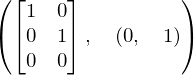

In [48]:
A = Matrix([[1, -1], [3, 4], [0, 2]])
A.rref()

## Cross product
In 3D space, cross product of two vectors, v1 and v2, yields another vector that is perpendicular to the two. The resulting vector is computed by constructing the determinant with the identity vector $(\hat{i}, \hat{j}, \hat{k})$ in the first column and v1 and v2 in the second and third respectively.

$A \times B$


In [49]:
v1 = Matrix([1,2,4])
v2 = Matrix([3,2,5])

i,j,k = symbols('i j k')
result = Matrix([[i,v1[0],v2[0]],[j,v1[1],v2[1]],[k,v1[2],v2[2]]]).det()
print(result)
[result.subs([(i,1),(j,0),(k,0)]), result.subs([(i,0),(j,1),(k,0)]), result.subs([(i,0),(j,0),(k,1)])]

2*i + 7*j - 4*k


## Eigenvalues & Eigenvectors

Given a transformation matrix $A$ if there exists a vector $\vec{v}$ and a scalar $\lambda$, such that: 

$A\vec{v} = \lambda\vec{v} \Rightarrow A\vec{v} = \lambda I\vec{v} \Rightarrow (A - \lambda I)\vec{v} = 0 \Rightarrow $

$$det(A - \lambda I) = 0$$

Then all possible values of $\lambda$ that satisfy the equation are called eigenvalues. Each of these values corresponds to one or more eigenvectors $\vec{v}$, which won't change their span after the transformation with matrix $A$.

**Eigenbasis** with respect to the transformation A is the set of new basis vectors (e.g. at least two in 2d) that are also eigenvectors. Transforming the original transformation matrix $A$ to $A'$ in the new basis guarantees that $A'$ will be diagonal.

{3: 1, 2: 1}


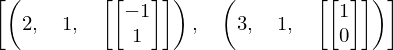

In [50]:
#eig(np.array([[3,1],[0,2]]))
m = Matrix([[3,1],[0,2]])
print(m.eigenvals()) # value:algebraic multiplicity
m.eigenvects() # eigenvalue, algebraic multiplicity, eigenvector

## Null space
In non-full rank matrices, this is the set of vectors that will get reduced to a line or a point. In other words, this is the space of all possible solutions of the system of equations (no single solution exists because det=0 & rank< full rank)

## Frobenius normal form
## Matrix equivalence
## Matrix congruence
## Singular value decomposition

https://www.youtube.com/watch?v=P5mlg91as1c

## PCA
## SVD
## Jacobian matrix
Jacobian is the matrix of partial derivatives of a $ R^n \longrightarrow R^m $ function. It has $m$ columns - one for each output (dependent) variable and $n$ rows - one for each input (independent) variable. Thus each column is the gradient of the respective dependent variable. 

https://www.value-at-risk.net/functions/

## Conjugate transponse
Conjugate transponse (Hermitian transponse) of a matrix with complex entries is obtained by first taking the transponse of the matrix and then taking the complex conjugate of each entry:

$ A^* = \overline{A^T}$, where complex conjugate is the element-wise operation: $a + ib \Rightarrow a - ib$.


# Some interesting matrix properties

## Similar
Two **square** matrices $A$ and $B$ are similar if $B=P^{-1}AP$ and $P$ is invertible.

## Diagonalizable

## Normal
A complex square matrix is normal if: $A^*A=AA^*$. For real matrices this reduces to: $A^TA=AA^T$






# Unitary matrices
A **complex square** matrix is unitary if its inverse is equal to its conjugate transponse: $А^{*} = A^{-1} \implies A^*A=AA^*=I$

For real valued matrices, the unitary is called orthogonal: $A^{T}=A^{-1} \implies A^TA=AA^T=I$

Unitary matrices preserve the euclidian norm (length) of a vector x during multiplication: $\lVert x \rVert = \lVert Ax \rVert$


In [51]:
np.conj(a).T

array([[1, 3],
       [2, 4]], dtype=int32)

In [52]:
a = np.array([[2,-1],[0.5,-0.5]])
np.matmul(a,a.T)

array([[5. , 1.5],
       [1.5, 0.5]])

In [53]:
x = np.array([[1,2],[3,4],[5,6]])
np.matmul(x,x.T) # symmetrize

array([[ 5, 11, 17],
       [11, 25, 39],
       [17, 39, 61]])

In [54]:
# 